<a href="https://colab.research.google.com/github/shintafiaa/Teaching-Assistant-Technobar/blob/main/Technobar/6_XGBoost_data_melb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Learn on how to build and optimize model with **gradient boosting.**

#Introduction
By definition, **ensemble methods** combine the predictions of several models (e.g., several trees, in the case of random forest).

Now, we'll learn about another ensemble method called gradient boosting.

#Difference of Decision Tree, Random Forest, and XGBoost

1. Decision Tree:
A decision tree is a simple and interpretable model that recursively splits the data into subsets based on the feature values. It forms a tree-like structure where each internal node represents a test on a feature, each branch represents the outcome of that test, and each leaf node represents the final prediction. The decision tree makes binary decisions at each node to split the data. It is prone to overfitting, especially when the tree becomes deep, capturing noise and leading to poor generalization on unseen data.

2. Random Forest:
Random Forest is an ensemble learning method that builds multiple decision trees and combines their predictions through voting (for classification) or averaging (for regression). Each decision tree is trained on a random subset of the data (bootstrap sample) and a random subset of the features. This randomness reduces overfitting and increases the model's ability to generalize to new data.

3. XGBoost (Extreme Gradient Boosting):
XGBoost is an optimized implementation of the Gradient Boosting algorithm. It creates an ensemble of weak learners (usually shallow decision trees) sequentially, where each new model corrects the errors made by the previous one. XGBoost uses a gradient-based optimization algorithm to minimize a loss function while adding new trees to the ensemble. It also includes regularization terms to control overfitting and speed up the training process. XGBoost is known for its high performance, scalability, and efficiency, making it popular in various machine learning competitions and real-world applications.
**XGBoost** is an implementation of gradient boosting with several additional features focused on perfmance and speed. The final result of an XGBoost model is a weighted sum of the predictions made by all the individual trees in the sequence. The contribution of each tree is adjusted during training based on how well it reduces the overall error.


Note:

* Regularization (penyederhanaan): XGBoost introduces regularization terms to control overfitting during the training process. Regularization helps prevent the model from becoming too complex and ensures better generalization to unseen data.


#Gradient Boosting

**Gradient boosting** is a method that goes through cycles to iteratively add models into an ensemble (setelan).

It begins by initializing the ensemble with a single model, whose predictions can be pretty naive. (Even if its predictions are wildly inaccurate, subsequent (kemudian) additions to the ensemble will address those errors.)

Then, we start the cycle:
1. First, we use the current ensemble to generate predictions for each observation in the dataset. To make a prediction, we **add the predictions from all models** in the ensemble.
2. These predictions are used to calculate a loss function (like mean squared error, for instance).
3. Then, we use the loss function to fit a new model that will be added to the ensemble. Specifically, we determine model parameters so that adding this new model to the ensemble will reduce the loss.
4. Finally, we add the new model to ensemble, and ...
5. Repeat!

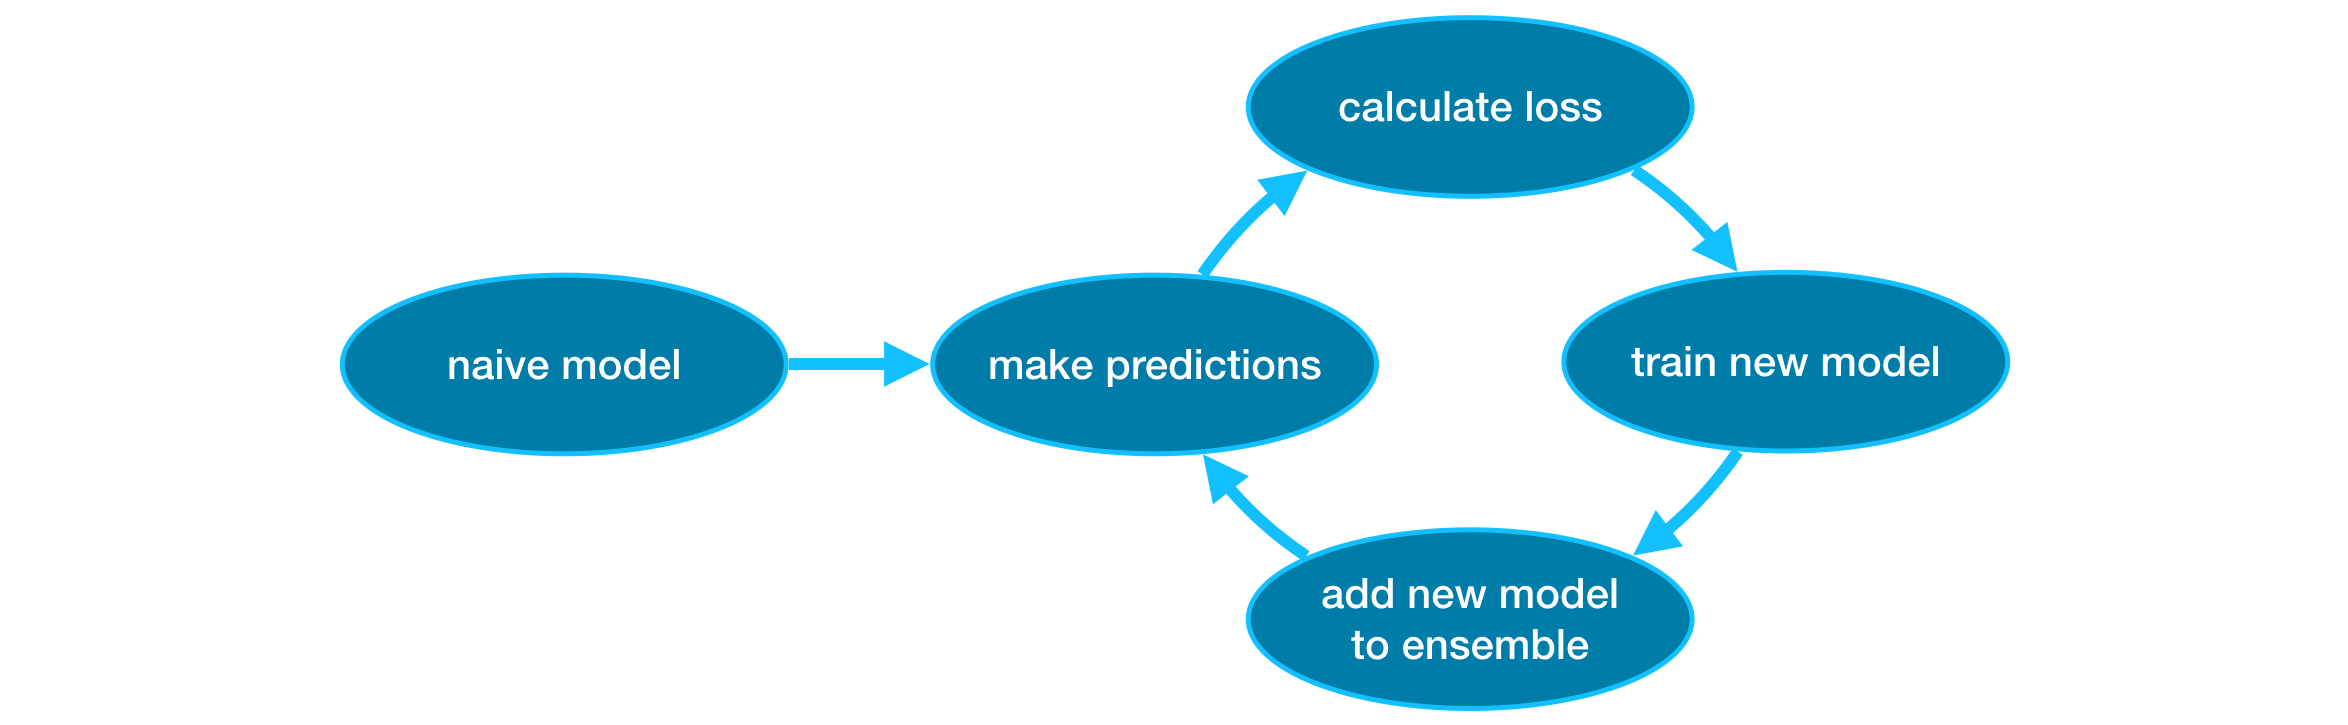

#Example
We begin by loading the training and validation data in X_train, X_valid, y_train, y_valid.

**Prompt:**

Write a code cell to mount Google Drive in Colab.

In [2]:
from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

drive.mount('/content/drive')

Mounted at /content/drive


**Prompt:**

Write a code cell to read a CSV file from Google Drive into a DataFrame.

In [40]:
import pandas as pd

# Ganti 'your_file_path' dengan path sebenarnya ke file CSV Anda di Google Drive
file_path = '/content/drive/My Drive/Dataset/tugasxgboost2.csv'

# Membaca file CSV ke dalam DataFrame
df = pd.read_csv(file_path, delimiter=';')

# Menampilkan beberapa baris pertama dari DataFrame
print(df.head())
print(df.tail())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

**Prompt:**

Write a code cell to select a subset of predictors ['Rooms', 'Distance', 'Landsize', 'BuildingArea', 'YearBuilt'] and set the target variable ['Price'] from the DataFrame.

In [41]:
# Memilih subset dari prediktor
predictors = ['fixed acidity', 'citric acid', 'chlorides', 'pH', 'alcohol']

# Menentukan target variabel
target = 'quality'

# Membuat DataFrame untuk prediktor
X = df[predictors]

# Membuat Series untuk target
y = df[target]

# Menampilkan beberapa baris pertama dari prediktor dan target
print("Predictors (X):")
print(X.head())

print("\nTarget (y):")
print(y.head())

Predictors (X):
   fixed acidity  citric acid  chlorides    pH  alcohol
0            7.0         0.36      0.045  3.00      8.8
1            6.3         0.34      0.049  3.30      9.5
2            8.1         0.40      0.050  3.26     10.1
3            7.2         0.32      0.058  3.19      9.9
4            7.2         0.32      0.058  3.19      9.9

Target (y):
0    6
1    6
2    6
3    6
4    6
Name: quality, dtype: int64


**Prompt:**

Write a code cell to split the data into training and validation

In [42]:
# Splitting the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

print("Training set:")
print(X_train.head())
print(y_train.head())

print("Validation set:")
print(X_valid.head())
print(y_valid.head())

Training set:
      fixed acidity  citric acid  chlorides    pH  alcohol
4685            7.2         0.32      0.062  3.23     10.5
4589            5.4         0.38      0.029  3.28     12.4
2700            6.5         0.31      0.027  3.26     11.5
283             6.7         0.30      0.054  3.19      9.3
1014            6.1         0.27      0.064  3.66      8.9
4685    5
4589    6
2700    7
283     5
1014    5
Name: quality, dtype: int64
Validation set:
      fixed acidity  citric acid  chlorides    pH  alcohol
2762            7.3         0.35      0.050  3.24     10.7
42              7.0         0.26      0.069  3.13      9.8
1419            7.6         0.74      0.040  3.07     10.8
3664            5.0         0.54      0.035  3.27     12.9
2125            6.0         0.22      0.048  3.20     10.1
2762    5
42      6
1419    7
3664    8
2125    5
Name: quality, dtype: int64


In the next code cell, we import the scikit-learn API for XGBoost (`xgboost.XGBRegressor`). As you'll see in the output, the `XGBRegressor` class has many tunable parameters.


**Prompt:**

Write a code cell to train the model using XGBoost, and print the mean absolute error on the validation set.

In [43]:
# Training the model using XGBoost
model = XGBRegressor(random_state=0)
model.fit(X_train, y_train)

# Predicting on the validation set
predictions = model.predict(X_valid)

# Calculating and printing the mean absolute error
mae = mean_absolute_error(y_valid, predictions)
print(f"Mean Absolute Error on the validation set: {mae}")

Mean Absolute Error on the validation set: 0.577746090597036


We also make predictions and evaluate the model.

#Parameter Tuning
XGBoost has a few parameters that can dramatically affect accuracy and training speed. The first parameters you should understand are:

`n_estimators`
Specifies how many times to go through the modeling cycle described above. It is equal to the number of models that we include in the ensemble.
* Too low a value causes underfitting, which leads to inaccurate predictions on both training data and test data.
* Too high a value causes overfitting, which causes accurate predictions on training data, but inaccurate predictions on test data (which is what we care about).

Typical values range from 100-1000, though this depends a lot on the `learning_rate` parameter discussed below.

Here is the code to set the number of models in the ensemble:

**Prompt:**

Write a code cell to create another XGBRegressor with 500 estimators, train it, and print the mean absolute error on the validation set.

In [44]:
# Training another XGBoost model with 500 estimators
model_500 = XGBRegressor(n_estimators=500, random_state=0)
model_500.fit(X_train, y_train)

# Predicting on the validation set with the new model
predictions_500 = model_500.predict(X_valid)

# Calculating and printing the mean absolute error for the new model
mae_500 = mean_absolute_error(y_valid, predictions_500)
print(f"Mean Absolute Error on the validation set with 500 estimators: {mae_500}")


Mean Absolute Error on the validation set with 500 estimators: 0.5417224249061273


The MAE result of the model with n_estimators set to 500 turned out to be greater than the default value of n_estimators, which is 100.

The MAE (Mean Absolute Error) of the model with an n_estimators value of 110 turns out to be smaller than the default n_estimators value of 100, as well as n_estimators with a value of 500.

`early_stopping_rounds`
offers a way to automatically find the ideal value for `n_estimators`. Early stopping causes the model to stop iterating when the validation score stop improving, even if we aren't the hard stop for `n_estimators`. It's smart to set a high value for `n_estimators` and then use `early_stopping_rounds` to find the optimal time to stop iterating.

Since random chance sometimes causes a single round where validation scores don't improve, you need to specify a number for how many rounds of straight deterioration (keburukan) to allow before stopping. Setting `early_stopping_rounds=5` is a reasonable choice. In this case, we stop after 5 straight rounds of deteriorating validation scores.

When using `early_stopping_rounds`, you also need to set aside some data for calculating the validation scores. This is done by setting the `eval_set` parameter.

We can modify the example above to include early stopping.

---
Note:

* In the context of training machine learning models, "deteriorating" refers to a situation where the performance of the model on a validation dataset worsens over consecutive iterations during the training process. Typically, we monitor a metric (such as accuracy, mean squared error, etc.) on the validation dataset to evaluate the model's performance.

* In the given code, verbose=False is an argument passed to the fit method of the XGBRegressor model. Setting verbose to False means that during the training process, the model will not produce any output or progress messages. It will train silently without displaying information about each boosting round.

`n_jobs`

On larger datasets where runtime is a consideration, you can use parallelism to build your model faster. It's common to set the parameter `n_jobs` equal to the number of cores on your machine. On smaller datasets, this won't help.
The resulting model won't be any better, so micro-optimizing for fitting time is typically nothing but a distraction. But, it's useful in large datasets where you would otherwise spend a long time waiting during the `fit` command.

Here's the modified example.

**Prompt:**

Write a code cell to train an XGBRegressor with a custom learning rate, 90 estimators, and early stopping rounds, and print the mean absolute error on the validation set.

In [45]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split


# Inisialisasi XGBRegressor dengan learning rate kustom
model = xgb.XGBRegressor(
    learning_rate=0.05,  # Learning rate kustom
    n_estimators=90,     # Jumlah estimator
    early_stopping_rounds=10,  # Early stopping
    objective='reg:squarederror',  # Tujuan untuk regresi
    eval_metric='mae'  # Menggunakan mean absolute error sebagai metrik evaluasi
)

# Melatih model dengan data pelatihan dan set validasi untuk early stopping
model.fit(
    X_train, y_train,
    eval_set=[(X_valid, y_valid)],
    verbose=False
)

# Membuat prediksi pada set validasi
y_pred = model.predict(X_valid)

# Menghitung dan mencetak Mean Absolute Error pada set validasi
mae = mean_absolute_error(y_valid, y_pred)
print(f"Mean Absolute Error pada Set Validasi: {mae}")

Mean Absolute Error pada Set Validasi: 0.6157381286426467


Kode dibawah menggunakan *XGBoost Regressor*, model berbasis *gradient boosting*, yang membangun serangkaian pohon keputusan untuk memprediksi variabel target dengan mengurangi kesalahan secara iteratif. Gradient boosting bekerja dengan membuat pohon-pohon secara berurutan, di mana setiap pohon mencoba mengoreksi kesalahan dari pohon sebelumnya, menghasilkan prediksi yang lebih akurat. Model ini diinisialisasi dengan *learning rate* sebesar 0,05 untuk mengatur besarnya penyesuaian di tiap iterasi dan menggunakan 90 estimators (pohon). *Early stopping* diterapkan untuk menghentikan pelatihan jika tidak ada peningkatan MAE pada data validasi dalam 10 iterasi terakhir. Setelah pelatihan, model menghasilkan prediksi pada set validasi, dan performanya diukur dengan *Mean Absolute Error* (MAE), yang menunjukkan rata-rata kesalahan prediksi model—semakin rendah MAE, semakin baik model dalam memprediksi nilai target.

In [46]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split


# Inisialisasi XGBRegressor dengan learning rate kustom
model = xgb.XGBRegressor(
    learning_rate=0.05,  # Learning rate kustom
    n_estimators=90,     # Jumlah estimator
    early_stopping_rounds=10,  # Early stopping
    objective='reg:squarederror',  # Tujuan untuk regresi
    eval_metric='mae'  # Menggunakan mean absolute error sebagai metrik evaluasi
)

# Melatih model dengan data pelatihan dan set validasi untuk early stopping
model.fit(
    X_train, y_train,
    eval_set=[(X_valid, y_valid)],
    verbose=False
)

# Membuat prediksi pada set validasi
y_pred = model.predict(X_valid)

# Menghitung dan mencetak Mean Absolute Error pada set validasi
mae = mean_absolute_error(y_valid, y_pred)
print(f"Mean Absolute Error pada Set Validasi: {mae}")

Mean Absolute Error pada Set Validasi: 0.6157381286426467


Inisialisasi Model: Model XGBRegressor diinisialisasi dengan learning rate 0,05, jumlah pohon (n_estimators) sebanyak 90, dan early stopping dengan 10 iterasi. Model menggunakan mean absolute error (MAE) sebagai metrik evaluasi.

Pelatihan Model: Model dilatih pada data pelatihan (X_train, y_train) dengan data validasi (X_valid, y_valid) untuk early stopping. Jika MAE pada data validasi tidak membaik dalam 10 iterasi berturut-turut, pelatihan akan dihentikan untuk mencegah overfitting.

Prediksi dan Evaluasi: Setelah pelatihan, model membuat prediksi pada data validasi, dan MAE dihitung untuk mengevaluasi akurasi prediksi. Nilai MAE yang lebih rendah menunjukkan kinerja model yang lebih baik.

Visualisasi Pentingnya Fitur: Bagian akhir kode menampilkan plot feature importance dari model. Feature importance menunjukkan seberapa penting setiap fitur dalam membuat keputusan prediksi. Parameter importance_type='weight' menunjukkan frekuensi fitur tersebut digunakan dalam pohon, max_num_features=10 membatasi plot pada 10 fitur terpenting, dan plt.show() menampilkan plot.

Mean Absolute Error pada Set Validasi: 0.6157381286426467


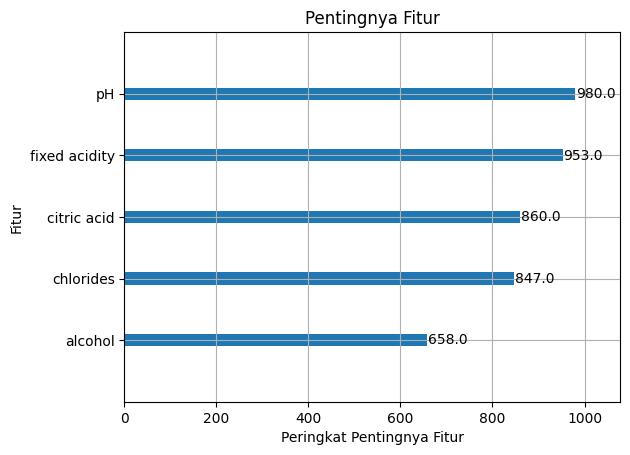

In [47]:
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Inisialisasi XGBRegressor dengan learning rate kustom
model = xgb.XGBRegressor(
    learning_rate=0.05,  # Learning rate kustom
    n_estimators=90,     # Jumlah estimator
    early_stopping_rounds=10,  # Early stopping
    objective='reg:squarederror',  # Tujuan untuk regresi
    eval_metric='mae'  # Menggunakan mean absolute error sebagai metrik evaluasi
)

# Melatih model dengan data pelatihan dan set validasi untuk early stopping
model.fit(
    X_train, y_train,
    eval_set=[(X_valid, y_valid)],
    verbose=False
)

# Membuat prediksi pada set validasi
y_pred = model.predict(X_valid)

# Menghitung dan mencetak Mean Absolute Error pada set validasi
mae = mean_absolute_error(y_valid, y_pred)
print(f"Mean Absolute Error pada Set Validasi: {mae}")

# Visualisasi Feature Importance
# Menampilkan plot importansi fitur
xgb.plot_importance(model,
                    importance_type='weight',  # Bisa diganti dengan 'weight', 'gain', atau 'cover'
                    max_num_features=10,       # Maksimal 10 fitur yang akan ditampilkan
                    title='Pentingnya Fitur',  # Judul grafik
                    xlabel='Peringkat Pentingnya Fitur',  # Label sumbu X
                    ylabel='Fitur')  # Label sumbu Y
plt.show()

Visualisasi ini akan menunjukkan bagaimana model XGBoost membagi data di setiap node untuk membuat prediksi. Setiap node dalam pohon menampilkan informasi seperti fitur yang digunakan, nilai split, gain, dan jumlah sampel di node tersebut. Visualisasi ini berguna untuk memahami logika pembagian yang digunakan oleh model serta interpretasi keputusan yang dibuat pada setiap cabang pohon.

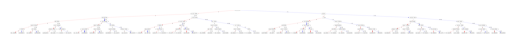

In [48]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Visualisasi Struktur Pohon (Tree)
# Menampilkan pohon pertama dari model
xgb.plot_tree(model, num_trees=0)  # num_trees=0 untuk pohon pertama (0-based index)
plt.show()


Kode di atas menampilkan *learning curve* atau kurva pembelajaran dari model *XGBoost Regressor* untuk memvisualisasikan perubahan *Mean Absolute Error* (MAE) pada data pelatihan dan validasi selama proses pelatihan. Pertama, hasil evaluasi model diambil melalui `model.evals_result()`, yang berisi nilai MAE di setiap iterasi untuk kedua set (pelatihan dan validasi). Lalu, kurva MAE untuk pelatihan dan validasi diplot sebagai fungsi dari jumlah *boosting rounds* (jumlah pohon yang ditambahkan). Plot ini membantu memahami apakah model mengalami *overfitting* atau *underfitting*, di mana selisih yang besar antara kesalahan pelatihan dan validasi menunjukkan potensi *overfitting*.

{'validation_0': OrderedDict([('mae', [0.7060466270057523, 0.6966989123091406, 0.6883225377725095, 0.6831589864224804, 0.679281074660165, 0.6762196015338509, 0.6741861645056277, 0.6717029702906706, 0.6695169794316195, 0.6681559192891023, 0.6653227596866841, 0.6629076729015428, 0.6608044259402217, 0.6594659240878358, 0.6577142978201107, 0.6557903572004669, 0.6541503818667664, 0.6522631294873296, 0.6512154744595897, 0.6494660022307416, 0.6484610864094326, 0.6466921592245296, 0.6455458003647473, 0.6440205900036559, 0.6424757441695855, 0.6413881764119985, 0.64005643542932, 0.6385450241517048, 0.6378355722038114, 0.6370253086090087, 0.636585367942343, 0.6356023165644432, 0.6348630978136647, 0.634021308957314, 0.633197834053818, 0.6327180677530717, 0.6324573876906414, 0.6317795918912303, 0.631029445297864, 0.6301091729378213, 0.6290333640818693, 0.6285171708282159, 0.6280799145601234, 0.6276274418344303, 0.6267824280018709, 0.6264730497282378, 0.6262544437330596, 0.6257722397239841, 0.625419

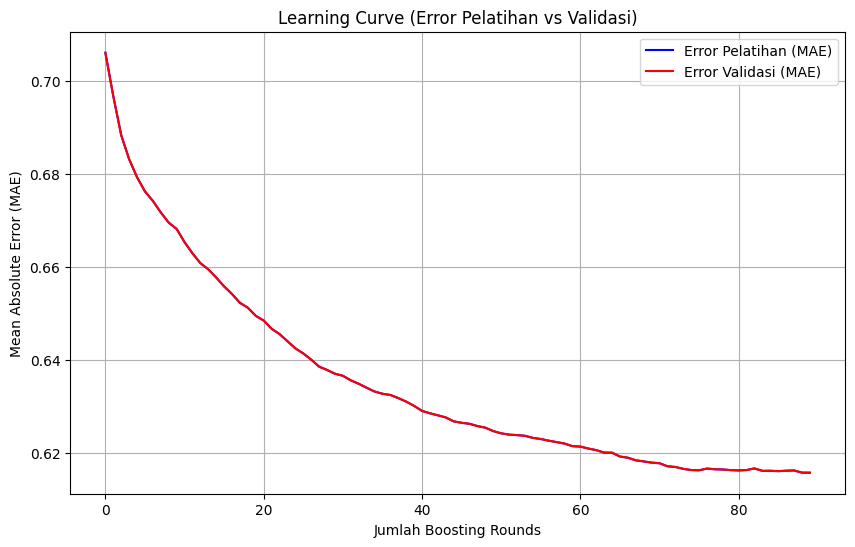

In [49]:
import matplotlib.pyplot as plt

# Mengakses hasil evaluasi
evals_result = model.evals_result()

# Menampilkan hasil evaluasi untuk memeriksa struktur
print(evals_result)  # Ini akan membantu Anda mengetahui struktur dictionary

# Misalnya, jika hanya ada 'validation_0', Anda dapat menggunakan:
train_error = evals_result['validation_0']['mae']  # MAE untuk pelatihan
valid_error = evals_result['validation_0']['mae']  # MAE untuk validasi (gunakan yang sama jika hanya satu set evaluasi)

# Membuat plot Learning Curve (Error pelatihan vs Validasi)
plt.figure(figsize=(10, 6))
plt.plot(train_error, label='Error Pelatihan (MAE)', color='blue')
plt.plot(valid_error, label='Error Validasi (MAE)', color='red')
plt.xlabel('Jumlah Boosting Rounds')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Learning Curve (Error Pelatihan vs Validasi)')
plt.legend()
plt.grid(True)
plt.show()

In [50]:
!pip install shap

kode dibawah menggunakan objek explainer yang dibuat menggunakan shap.Explainer(model) digunakan untuk menghubungkan model XGBoost terlatih dengan SHAP untuk menghitung SHAP values. Lalu, shap_values = explainer(X_train) digunakan untuk menghitung SHAP values dari setiap fitur pada setiap data dalam X_train, yang menunjukkan seberapa besar setiap fitur mempengaruhi prediksi model secara positif atau negatif. Terakhir, shap.summary_plot(shap_values, X_train) membuat SHAP summary plot, visualisasi yang menunjukkan dampak rata-rata dari setiap fitur pada prediksi model. Fitur-fitur diurutkan berdasarkan pengaruhnya, dengan warna yang menunjukkan hubungan antara nilai fitur dan arah dampaknya. Plot ini membantu mengidentifikasi fitur-fitur yang paling berpengaruh dalam prediksi model dan memberi wawasan tentang pola yang dipelajari oleh model.**bold text**

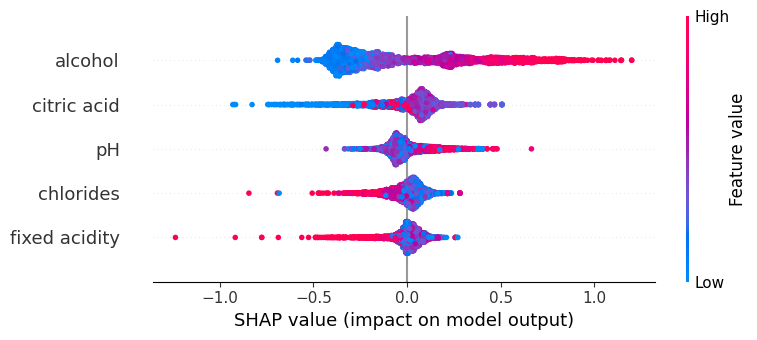

In [51]:
import shap
import xgboost as xgb
import matplotlib.pyplot as plt

# Jika model XGBoost sudah dilatih, lanjutkan di bawah ini
# Pastikan untuk mengganti 'model' dengan model yang sudah dilatih

# Menghitung SHAP values untuk data pelatihan
explainer = shap.Explainer(model)  # Membuat objek explainer untuk model XGBoost
shap_values = explainer(X_train)  # Menghitung SHAP values untuk data pelatihan

# Visualisasi SHAP summary plot
shap.summary_plot(shap_values, X_train)

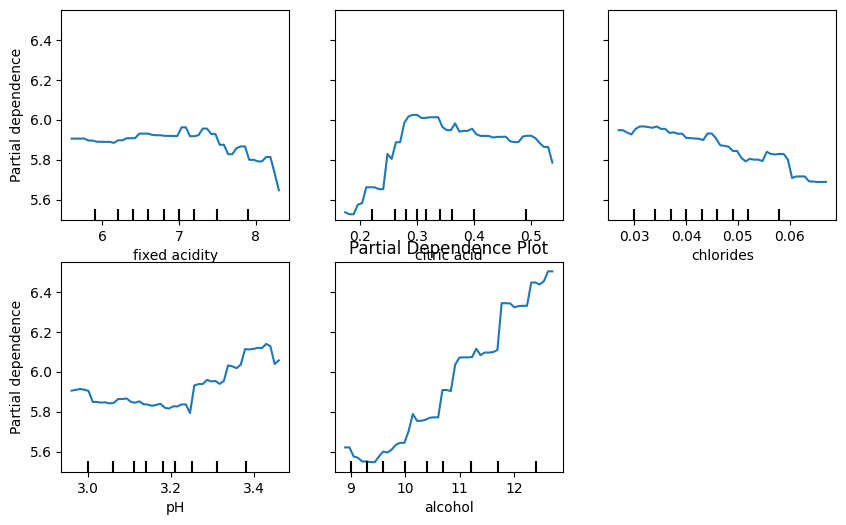

In [52]:


from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Misalkan model Anda adalah model yang sudah dilatih
# X_train adalah data fitur pelatihan Anda

# Membuat Partial Dependence Plot untuk fitur tertentu (misalnya, 'Rooms', 'Distance', dll)
features = ['fixed acidity', 'citric acid', 'chlorides', 'pH', 'alcohol']  # List of features

# Membuat plot
fig, ax = plt.subplots(figsize=(10, 6))  # Ukuran plot

# Membuat Partial Dependence Plot untuk fitur yang dipilih
PartialDependenceDisplay.from_estimator(model, X_train, features=features, ax=ax, grid_resolution=50)

# Menampilkan plot
plt.title("Partial Dependence Plot")
plt.show()


